Problem Statements : Fitur apa yang paling berpengaruh terhadap pengunduran diri pelanggan terhadap kartu kredit

Nama : Muhammad Iqbal Pradipta

**Menghubungkan Google Drive**

Pada langkah pertama menghubungkan Google Drive ke lingkungan Google Colab untuk mengakses dataset yang diperlukan.

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Menentukan path file**

Menentukan path atau lokasi file yang akan diakses di Google Drive ketika menggunakan Google Colab

In [109]:
base_path = '/content/drive/My Drive/ColabNotebooks/dicoding_ai/machine_learning_terapan/customer_cc.csv'

**Import Package**

Import package untuk proses visualisasi data dan development model

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder

**Baca File .csv**

Membaca file csv agar menyesuaikan ke pandas Dataframe

In [111]:
credit_card = pd.read_csv(base_path)
credit_card

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


**Melihat Jumlah Baris dan Jumlah Kolom di dataset credit_card**

In [112]:
rows, cols = credit_card.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")

Jumlah baris: 10127
Jumlah kolom: 23


**Melihat jumlah nilai null di setiap kolom**

In [113]:
null_values = credit_card.isnull().sum()
print(null_values)

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**Mengubah nama kolom**

Ada 2 kolom yang terlalu panjang sehingga diubah agar tidak terlalu panjang

In [114]:
credit_card.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'Naive_Bayes_Classifier_1_mon1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'Naive_Bayes_Classifier_2_mon2'
}, inplace=True)

# Menampilkan kolom setelah diubah namanya
print("Kolom setelah diubah namanya:", credit_card.columns.tolist())

Kolom setelah diubah namanya: ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_1_mon1', 'Naive_Bayes_Classifier_2_mon2']


In [115]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Attrition_Flag                 10127 non-null  object 
 2   Customer_Age                   10127 non-null  int64  
 3   Gender                         10127 non-null  object 
 4   Dependent_count                10127 non-null  int64  
 5   Education_Level                10127 non-null  object 
 6   Marital_Status                 10127 non-null  object 
 7   Income_Category                10127 non-null  object 
 8   Card_Category                  10127 non-null  object 
 9   Months_on_book                 10127 non-null  int64  
 10  Total_Relationship_Count       10127 non-null  int64  
 11  Months_Inactive_12_mon         10127 non-null  int64  
 12  Contacts_Count_12_mon          10127 non-null 

In [116]:
credit_card

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1_mon1,Naive_Bayes_Classifier_2_mon2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [117]:
credit_card.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1_mon1,Naive_Bayes_Classifier_2_mon2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


**Boxplot**

Dari boxplot ini menunjukkan bahwa mayoritas pelanggan berada dalam rentang usia 40-52 tahun, dengan beberapa outliers yang usianya di atas 70 tahun

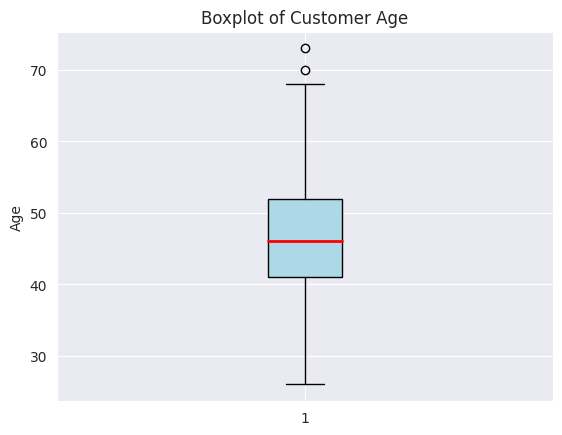

In [118]:
# Membuat boxplot untuk fitur 'Customer_Age' dengan warna khusus untuk melihat outliers
box = plt.boxplot(credit_card['Customer_Age'], patch_artist=True)

for box_element in box['boxes']:
    box_element.set(facecolor='lightblue')

for median_element in box['medians']:
    median_element.set(color='red', linewidth=2)

plt.title('Boxplot of Customer Age')
plt.ylabel('Age')

plt.show()

**Menampilkan kolom mana yang bersifat kategorikal**

Kode ini berfungsi untuk mengidentifikasi kolom mana saja yang bersifat kategorikal dalam dataset credit_card, yang sering kali diperlukan untuk tahap pre-processing seperti encoding (misalnya dengan Label Encoding) sebelum digunakan dalam model machine learning.

In [119]:
categorical_features = credit_card.select_dtypes(include=['object']).columns.tolist()

# Menampilkan array yang berisi nama-nama kolom bertipe object
print(categorical_features)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


Kode ini digunakan untuk memahami distribusi data pada kolom kategorikal yang lebih tepatnya kolom Attrition_Flag dalam dataset. Ini memberikan informasi mengenai seberapa sering masing-masing kategori muncul serta kontribusi persentasenya terhadap keseluruhan data.

In [120]:
feature = categorical_features[0]
count = credit_card[feature].value_counts()
percent = 100*credit_card[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)

                   jumlah sampel  persentase
Attrition_Flag                              
Existing Customer           8500        83.9
Attrited Customer           1627        16.1


**Menghitung Frekuensi dari Kategori Attrition_Flag**

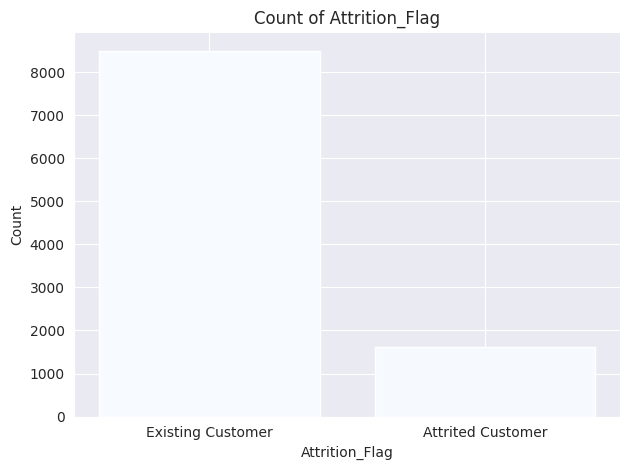

In [121]:
# Hitung frekuensi dari setiap kategori
counts = credit_card[feature].value_counts()

plt.bar(counts.index, counts.values, color=plt.cm.Blues(range(len(counts))))

plt.xlabel(feature)
plt.ylabel('Count')
plt.title(f'Count of {feature}')

plt.xticks()
plt.tight_layout()
plt.show()

Kode dibawah ini untuk membuat subplot per kategori kolom Marital_Status dengan kolom Gender.

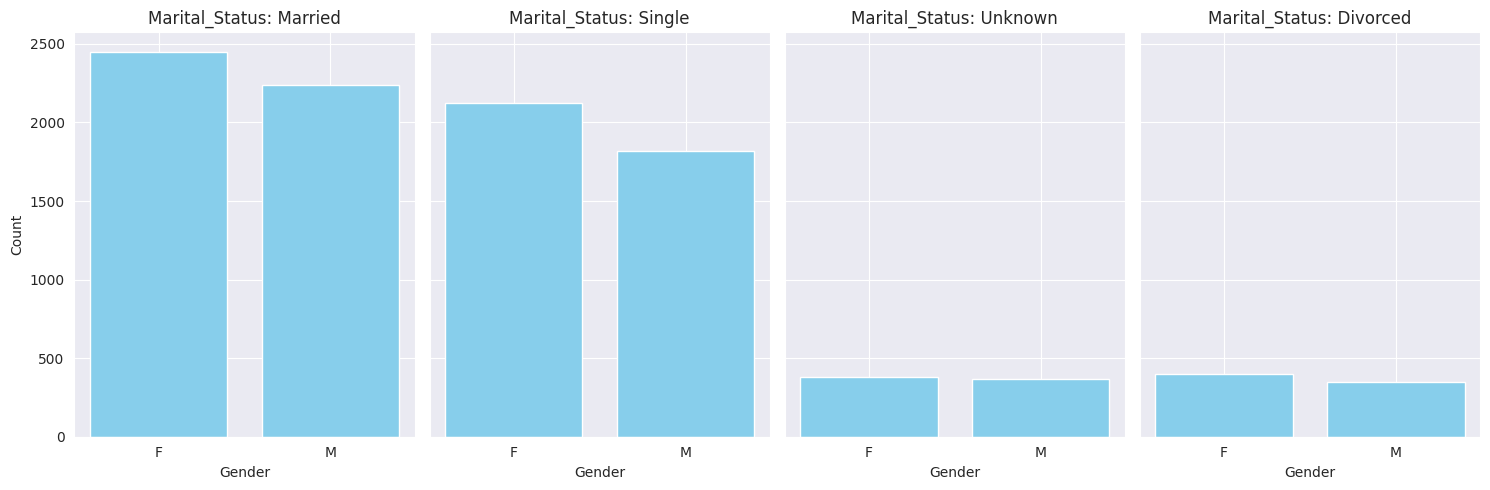

In [122]:
# Menggunakan plt.subplots() untuk membuat subplot per kategori
unique_categories = credit_card[categorical_features[3]].unique()
fig, axes = plt.subplots(1, len(unique_categories), figsize=(15, 5), sharey=True)

for i, category in enumerate(unique_categories):
    subset = credit_card[credit_card[categorical_features[3]] == category]

    counts = subset[categorical_features[1]].value_counts()

    axes[i].bar(counts.index, counts.values, color='skyblue')
    axes[i].set_title(f'{categorical_features[3]}: {category}')
    axes[i].set_xlabel(categorical_features[1])

axes[0].set_ylabel('Count')


plt.tight_layout()
plt.show()

**Penjelasan Kode**

Kode ini memvisualisasikan distribusi pelanggan yang ditandai oleh kolom Attrition_Flag berdasarkan kombinasi Gender dan Marital_Status.
Grafik ini berguna untuk melihat pola apakah ada hubungan antara gender, status pernikahan, dan kecenderungan pelanggan untuk berhenti menggunakan layanan (churn).

**Interpretasi Bisnis:**

**1. Pelanggan Existing vs Attrited Berdasarkan Gender dan Status Pernikahan:**

* Baik pada pria maupun wanita, pelanggan yang sudah menikah tampaknya memiliki tingkat churn (attrited) yang lebih rendah dibandingkan dengan pelanggan yang masih single atau tidak diketahui status pernikahannya.
* Pada kategori pelanggan "Married" (baik pria maupun wanita), terdapat jumlah pelanggan existing yang sangat tinggi dibandingkan dengan pelanggan yang attrited.
* Pelanggan dengan status "Single" juga menunjukkan pola serupa, meskipun dengan jumlah yang sedikit lebih rendah.

**2. Peran Status Pernikahan dalam Pelanggan Attrited:**

* Pelanggan dengan status pernikahan "Unknown" dan "Divorced" cenderung memiliki tingkat churn yang lebih tinggi atau hampir sama dengan existing customer dalam kategori tertentu.
* Ini bisa menunjukkan bahwa status pernikahan mempengaruhi stabilitas hubungan pelanggan dengan perusahaan, di mana pelanggan yang menikah cenderung lebih setia.

**3. Peluang Segmentasi Pelanggan:**

* Pelanggan yang sudah menikah tampaknya lebih loyal dibandingkan dengan kategori lainnya. Hal ini bisa digunakan oleh perusahaan untuk menawarkan produk yang lebih relevan bagi segmen ini.


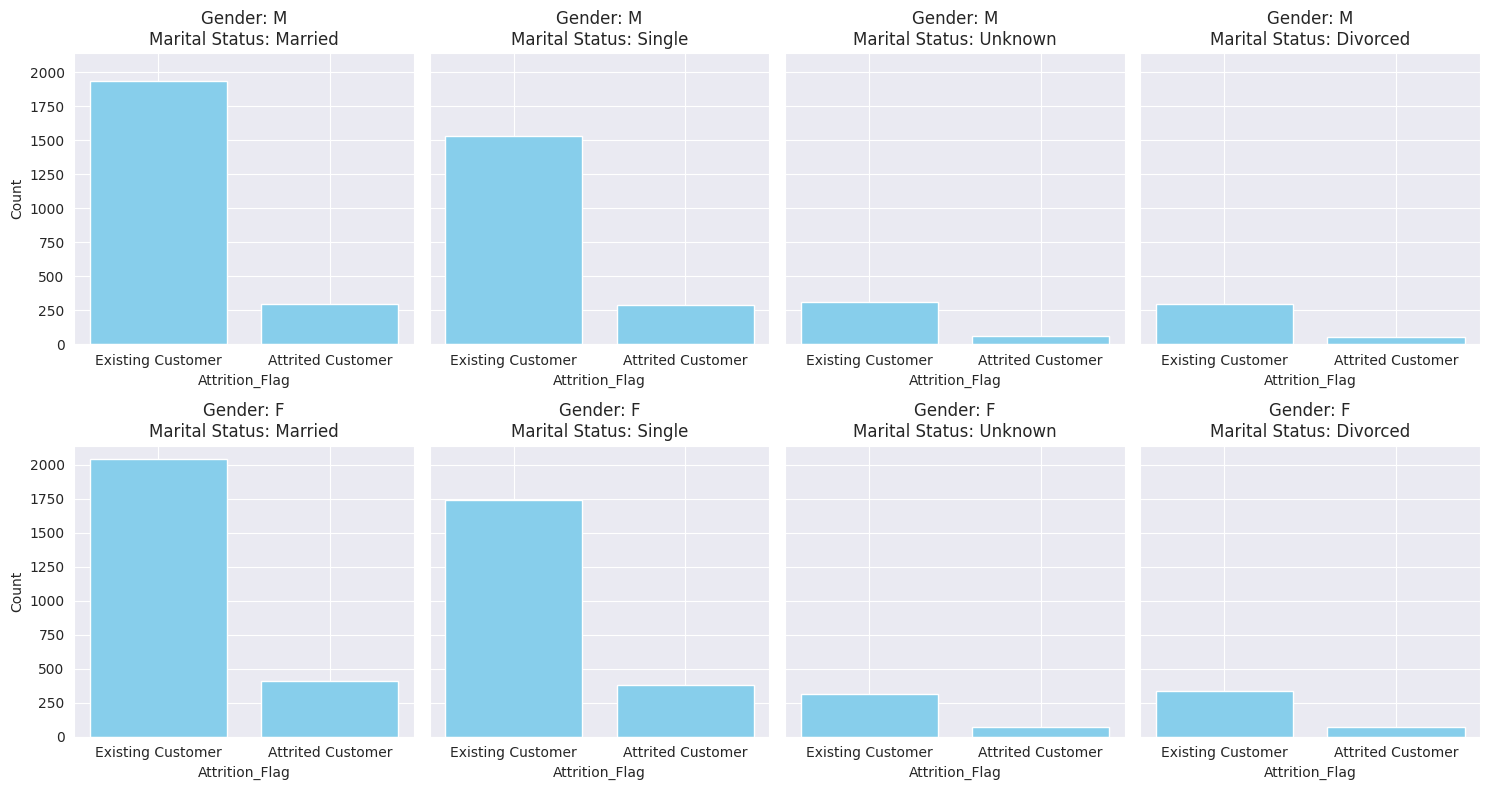

In [123]:
# Menggunakan plt.subplots() untuk membuat subplot per kombinasi Gender dan Marital_Status
unique_genders = credit_card['Gender'].unique()
unique_marital_status = credit_card['Marital_Status'].unique()

fig, axes = plt.subplots(len(unique_genders), len(unique_marital_status), figsize=(15, 8), sharey=True)

for i, gender in enumerate(unique_genders):
    for j, marital_status in enumerate(unique_marital_status):
        subset = credit_card[(credit_card['Gender'] == gender) & (credit_card['Marital_Status'] == marital_status)]

        counts = subset['Attrition_Flag'].value_counts()

        axes[i, j].bar(counts.index, counts.values, color='skyblue')
        axes[i, j].set_title(f'Gender: {gender}\nMarital Status: {marital_status}')
        axes[i, j].set_xlabel('Attrition_Flag')

        if j == 0:
            axes[i, j].set_ylabel('Count')

plt.tight_layout()
# plt.title('Customer Behavior Analysis Based on Gender, Marital Status, and Customer Attribute Flags')

plt.show()


**Penjelasn Kode**

Kode ini untuk menunjukkan jumlah pelanggan dalam setiap kategori pendapatan (Income_Category) yang dibagi berdasarkan apakah pelanggan tersebut masih ada atau sudah berhenti (Existing Customer atau Attrited Customer)

**Interpretasi Bisnis:**

**1. Distribusi Pelanggan Existing:**

* Pelanggan dengan pendapatan kurang dari 40K memiliki jumlah paling tinggi dalam kategori existing customer, jauh melebihi kategori pendapatan lainnya. Hal ini menunjukkan bahwa perusahaan memiliki basis pelanggan yang kuat di segmen berpenghasilan rendah.
Kategori pendapatan 40K s/d 60K juga memiliki jumlah pelanggan existing yang cukup besar, meskipun lebih sedikit dibandingkan kategori berpenghasilan rendah.
* Pelanggan existing di kategori pendapatan 120K+ dan 80K s/d 120K relatif sedikit, menandakan bahwa perusahaan tidak banyak menarik pelanggan di segmen pendapatan tinggi.

**2. Distribusi Pelanggan Attrited (Churned):**

* Pelanggan attrited juga cenderung lebih banyak di kategori pendapatan kurang dari 40K dan Unknown, tetapi dalam jumlah yang lebih kecil dibandingkan existing customer.
* Kategori pendapatan yang lebih tinggi, seperti 120K+ dan 80K s/d 120K, memiliki jumlah churn yang sangat rendah. Ini mungkin menunjukkan bahwa pelanggan berpenghasilan tinggi cenderung lebih stabil atau perusahaan lebih jarang menjangkau segmen ini.

**3. Peluang dan Tantangan:**

* Peluang di Segmen Berpenghasilan Rendah: Basis pelanggan terbesar perusahaan berada di segmen berpenghasilan rendah. Perusahaan dapat terus fokus di segmen ini dengan produk yang terjangkau dan program loyalitas yang kuat.
* Tantangan di Segmen Berpenghasilan Tinggi: Perusahaan memiliki basis pelanggan yang sangat kecil di segmen pendapatan tinggi, baik untuk existing maupun attrited customer. Ada peluang untuk memperluas penetrasi di pasar ini dengan penawaran produk yang lebih premium dan layanan yang disesuaikan.
* Kategori "Unknown": Sejumlah pelanggan di kategori "Unknown" menandakan kurangnya informasi pendapatan pelanggan. Mengidentifikasi pendapatan ini dapat memberikan insight yang lebih baik untuk strategi retensi dan akuisisi pelanggan.

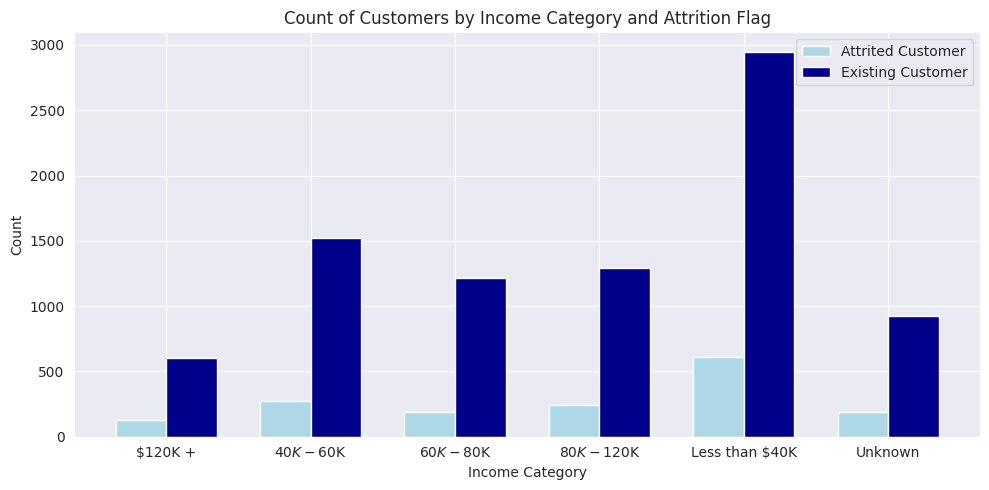

In [124]:
plt.figure(figsize=(10,5))

income_attrition_counts = credit_card.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()

x = np.arange(len(income_attrition_counts))

width = 0.35

plt.bar(x - width/2, income_attrition_counts['Attrited Customer'], width, label='Attrited Customer', color='lightblue')
plt.bar(x + width/2, income_attrition_counts['Existing Customer'], width, label='Existing Customer', color='darkblue')

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Count of Customers by Income Category and Attrition Flag')

plt.xticks(x, income_attrition_counts.index)

plt.legend()

plt.tight_layout()
plt.show()

**Churn vs Non-Churn berdasarkan Kategori Kartu**

Grafik ini memberikan visualisasi yang jelas mengenai jumlah pelanggan yang berhenti (churn) dibandingkan dengan pelanggan yang masih aktif (non-churn) berdasarkan kategori kartu.

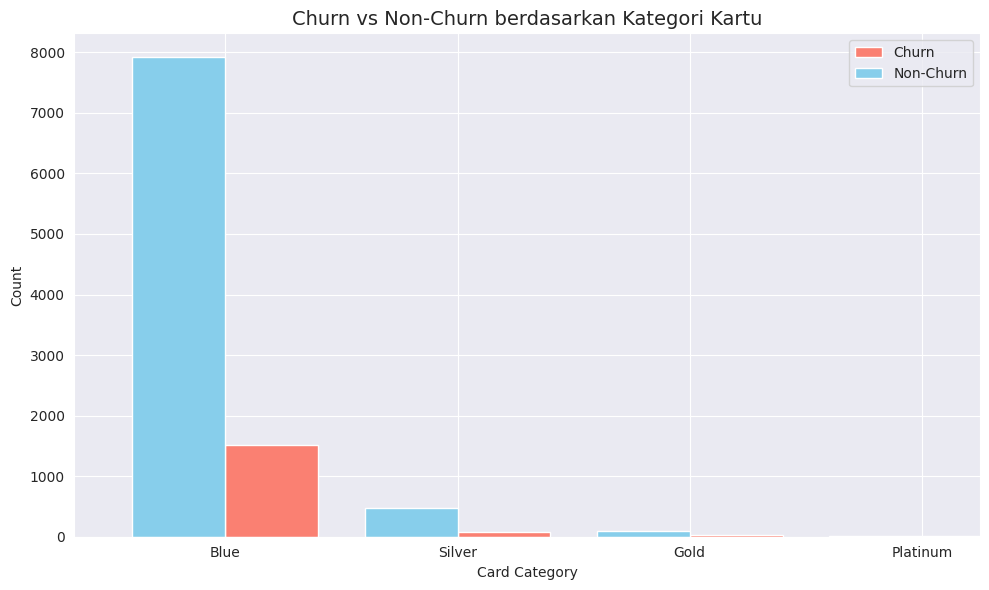

In [125]:
# Memisahkan data churn dan non-churn
churn_data = credit_card[credit_card['Attrition_Flag'] == 'Attrited Customer']
non_churn_data = credit_card[credit_card['Attrition_Flag'] == 'Existing Customer']

# Menghitung jumlah setiap kategori kartu untuk churn dan non-churn
churn_counts = churn_data['Card_Category'].value_counts()
non_churn_counts = non_churn_data['Card_Category'].value_counts()

# Membuat plot bar untuk churn dan non-churn secara berdampingan
fig, ax = plt.subplots(figsize=(10, 6))

# Menambahkan bar untuk churn dan non-churn
churn_counts.plot(kind='bar', color='salmon', ax=ax, position=0, width=0.4, label='Churn')
non_churn_counts.plot(kind='bar', color='skyblue', ax=ax, position=1, width=0.4, label='Non-Churn')

# Menambahkan judul dan label
ax.set_title('Churn vs Non-Churn berdasarkan Kategori Kartu', fontsize=14)
ax.set_xlabel('Card Category')
ax.set_ylabel('Count')
ax.legend()

plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


**Histogram and KDE of Months on Book**

Plot dibawah ini menunjukkan distribusi lama waktu pelanggan (dalam bulan) telah terdaftar di bank. Histogram memperlihatkan distribusi data asli, sementara KDE menambahkan kurva halus yang memperkirakan distribusi probabilitas dari data tersebut. Kombinasi histogram dan KDE ini berguna untuk memahami bagaimana data terdistribusi secara lebih rinci.


**Sebaran Data**

* Grafik menunjukkan distribusi yang sedikit miring ke kanan. Artinya, terdapat lebih sedikit nasabah yang telah menjadi pelanggan lebih lama, dan sebagian besar nasabah memiliki waktu berlangganan kurang dari 50 bulan.

* Ada beberapa nasabah yang memiliki waktu berlangganan lebih lama (lebih dari 50 bulan), tetapi jumlahnya sangat kecil dibandingkan dengan kelompok yang berada di sekitar 36 bulan.

**Interpretasi Bisnis**

* Bank mungkin ingin fokus pada nasabah dengan waktu berlangganan di sekitar 36 bulan karena ini adalah kelompok yang paling besar. Ini bisa menjadi target potensial untuk meningkatkan keterlibatan atau menawarkan produk baru.

* Nasabah yang sudah berlangganan lebih lama (lebih dari 50 bulan) adalah kelompok kecil yang mungkin membutuhkan perhatian khusus, terutama jika ada kekhawatiran tentang churn atau loyalitas nasabah.

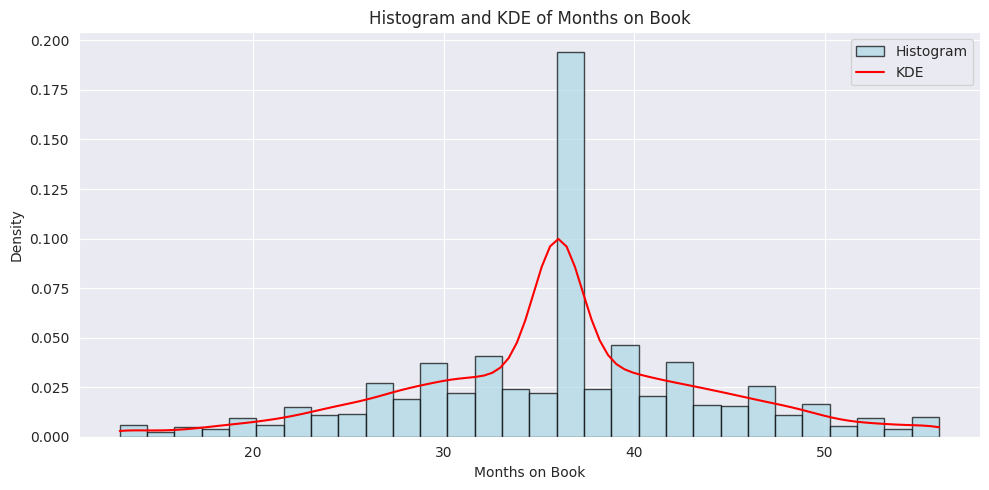

In [126]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10,5))

# Membuat histogram untuk kolom 'Months_on_book'
# Months_on_book: Lama waktu (dalam bulan) pelanggan telah terdaftar (Integer).

data = credit_card['Months_on_book']
plt.hist(data, bins=30, color='lightblue', edgecolor='black', alpha=0.7, density=True, label='Histogram')

# Menambahkan KDE (Kernel Density Estimation)
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 100)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE')

# Menambahkan label dan judul
plt.xlabel('Months on Book')
plt.ylabel('Density')
plt.title('Histogram and KDE of Months on Book')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

**Count of Customers by Total Relationship Count and Attrition Flag**

**Interpretasi Bisnis**
* Keterkaitan Antara Jumlah Produk dan Churn: Grafik menunjukkan bahwa pelanggan dengan lebih banyak produk (Total Relationship Count lebih tinggi) cenderung untuk tetap menggunakan layanan bank. Ini menunjukkan bahwa memperluas hubungan dengan pelanggan bisa menjadi strategi untuk mengurangi churn.
* Fokus pada Pelanggan dengan Hubungan Rendah: Pelanggan dengan 1 atau 2 hubungan memiliki proporsi yang lebih tinggi untuk berhenti. Bank mungkin ingin merancang strategi untuk meningkatkan keterlibatan mereka atau menawarkan produk tambahan untuk mengurangi risiko churn.

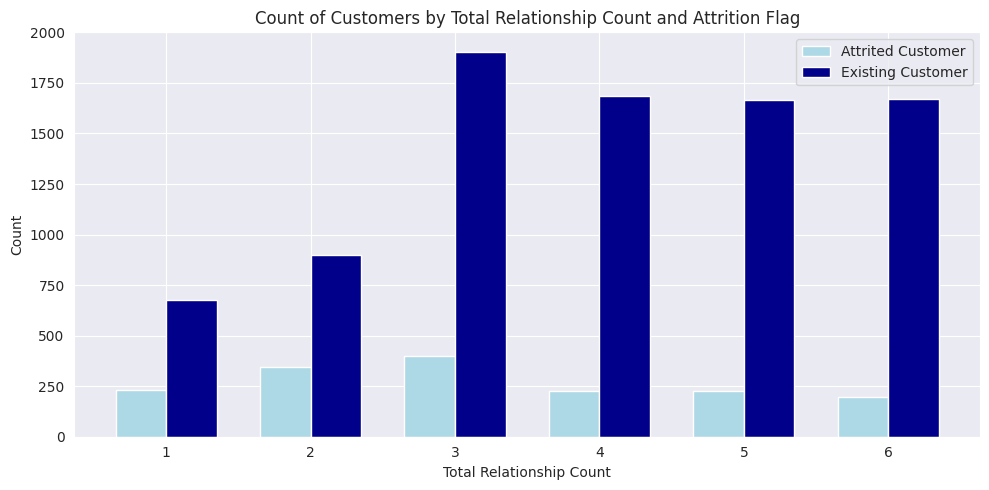

In [127]:
# Menentukan ukuran figure
plt.figure(figsize=(10, 5))

# Menghitung frekuensi untuk setiap kombinasi Total_Relationship_Count dan Attrition_Flag
counts = credit_card.groupby(['Total_Relationship_Count', 'Attrition_Flag']).size().unstack(fill_value=0)

x = np.arange(len(counts))

width = 0.35

plt.bar(x - width/2, counts['Attrited Customer'], width, label='Attrited Customer', color='lightblue')
plt.bar(x + width/2, counts['Existing Customer'], width, label='Existing Customer', color='darkblue')

plt.xlabel('Total Relationship Count')
plt.ylabel('Count')
plt.title('Count of Customers by Total Relationship Count and Attrition Flag')

plt.xticks(x, counts.index, rotation=0)

plt.legend()

plt.tight_layout()
plt.show()

**Count of Customers by Months Inactive and Contacts Count (12 months)**
- Months_Inactive_12_mon: Jumlah bulan pelanggan tidak aktif dalam 12 bulan terakhir (Integer).
- Contacts_Count_12_mon: Jumlah kontak yang dilakukan pelanggan dengan penyedia dalam 12 bulan terakhir (Integer).
- Menghitung frekuensi untuk setiap kombinasi Months_Inactive_12_mon dan Contacts_Count_12_mon

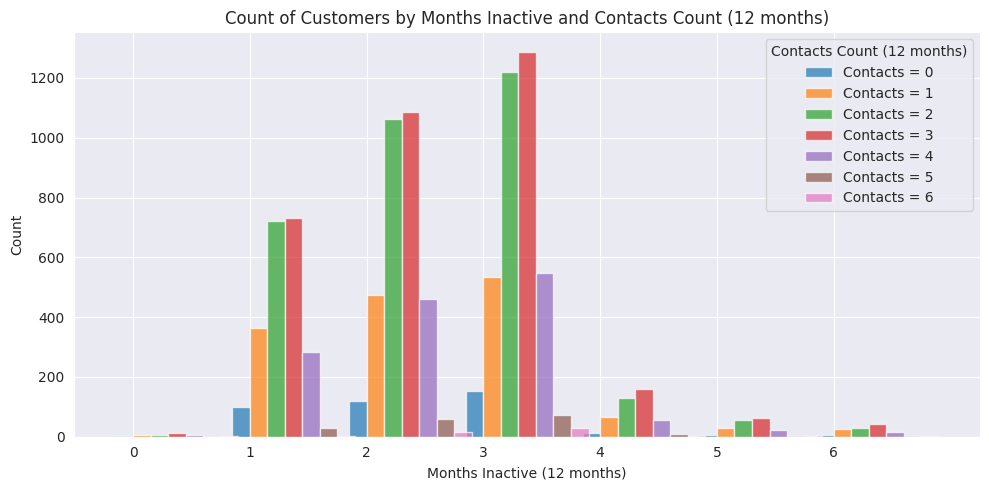

In [128]:
# Contacts_Count_12_mon VS. Months_Inactive_12_mon
plt.figure(figsize=(10, 5))

# Months_Inactive_12_mon: Jumlah bulan pelanggan tidak aktif dalam 12 bulan terakhir (Integer).
# Contacts_Count_12_mon: Jumlah kontak yang dilakukan pelanggan dengan penyedia dalam 12 bulan terakhir (Integer).
# Menghitung frekuensi untuk setiap kombinasi Months_Inactive_12_mon dan Contacts_Count_12_mon
counts = credit_card.groupby(['Months_Inactive_12_mon', 'Contacts_Count_12_mon']).size().unstack(fill_value=0)

x = np.arange(len(counts))

width = 0.15

for i, column in enumerate(counts.columns):
    plt.bar(x + (i * width), counts[column], width, label=f'Contacts = {column}', alpha=0.7)

plt.xlabel('Months Inactive (12 months)')
plt.ylabel('Count')
plt.title('Count of Customers by Months Inactive and Contacts Count (12 months)')

plt.xticks(x + width / 2, counts.index)

plt.legend(title='Contacts Count (12 months)')

plt.tight_layout()
plt.show()

**Histogram and KDE of Credit Limit**
* Menunjukkan distribusi batas kredit (credit limit) dalam populasi.
* Mayoritas orang memiliki batas kredit yang rendah, terlihat dari konsentrasi tinggi pada nilai antara 0 hingga sekitar 5000.
* Jumlah orang yang memiliki batas kredit tinggi (di atas 10.000) menurun drastis, dan sangat sedikit orang yang memiliki batas kredit di sekitar 30.000 hingga 35.000.

* Fungsi KDE memberikan estimasi mulus dari distribusi data, sehingga kita dapat melihat tren secara lebih halus.
* Garis ini menegaskan bahwa distribusi cenderung miring ke kanan (right-skewed), dengan sebagian besar data terkonsentrasi di batas kredit yang rendah.
* Ada sedikit kenaikan pada batas kredit sekitar 35.000, yang mungkin menunjukkan adanya beberapa pengguna dengan batas kredit tinggi yang signifikan.

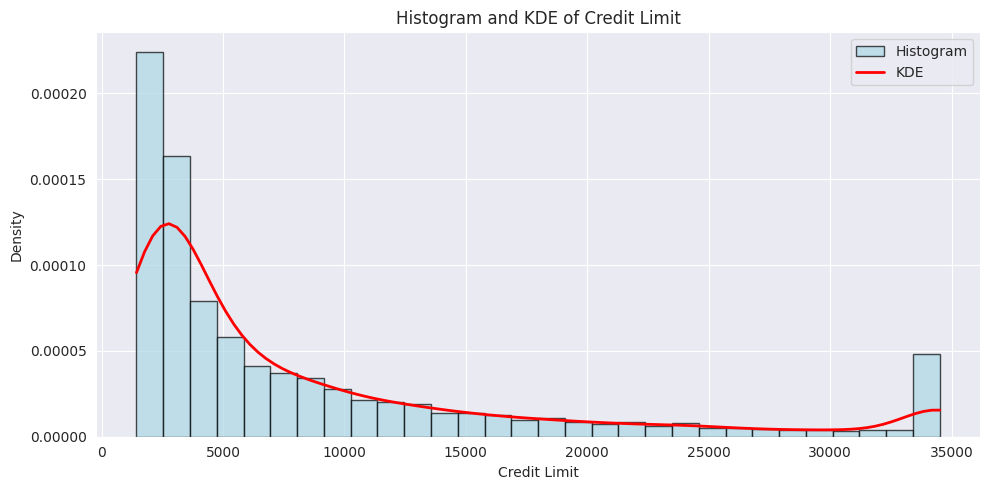

In [129]:
plt.figure(figsize=(10, 5))

# Membuat histogram untuk kolom 'Credit_Limit'
data = credit_card['Credit_Limit']
plt.hist(data, bins=30, color='lightblue', edgecolor='black', alpha=0.7, density=True, label='Histogram')

# Menambahkan KDE (Kernel Density Estimation)
kde = gaussian_kde(data)
x_vals = np.linspace(data.min(), data.max(), 100)
plt.plot(x_vals, kde(x_vals), color='red', label='KDE', linewidth=2)

# Menambahkan label dan judul
plt.xlabel('Credit Limit')
plt.ylabel('Density')
plt.title('Histogram and KDE of Credit Limit')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari perspektif bisnis, grafik bisa mengindikasikan stabilitas dalam penggunaan kartu kredit dari satu kuartal ke kuartal berikutnya. Jika mengharapkan peningkatan penggunaan kartu kredit di Q1 (misalnya, setelah periode belanja Q4 yang tinggi), hasil ini mungkin menunjukkan perlunya penyesuaian strategi promosi atau marketing untuk mendorong lebih banyak transaksi di awal tahun.

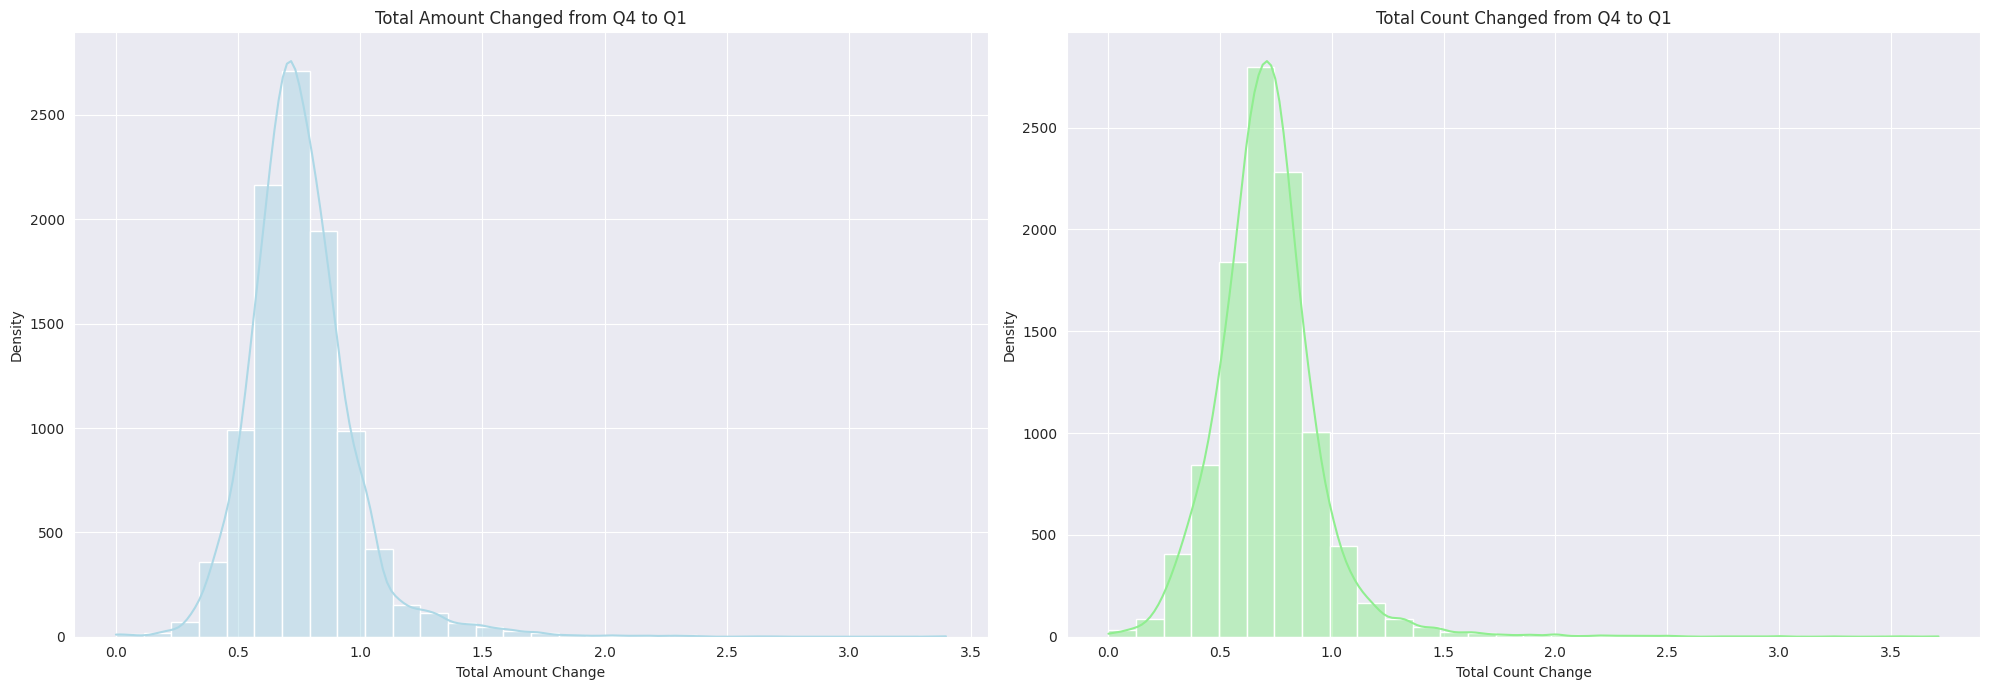

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Histogram untuk perubahan total jumlah dari Q4 ke Q1
sns.histplot(x='Total_Amt_Chng_Q4_Q1', data=credit_card, kde=True, ax=ax[0], color='lightblue', bins=30)
ax[0].set_title('Total Amount Changed from Q4 to Q1')
ax[0].set_xlabel('Total Amount Change')
ax[0].set_ylabel('Density')

# Histogram untuk perubahan total hitungan dari Q4 ke Q1
sns.histplot(x='Total_Ct_Chng_Q4_Q1', data=credit_card, kde=True, ax=ax[1], color='lightgreen', bins=30)
ax[1].set_title('Total Count Changed from Q4 to Q1')
ax[1].set_xlabel('Total Count Change')
ax[1].set_ylabel('Density')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Segmentation of Customer Behavior**

- **Nasabah Berfrekuensi Tinggi, Nilai Rendah**: Kelompok di kanan menunjukkan nasabah yang aktif bertransaksi tetapi dengan nilai transaksi yang kecil. Mereka mungkin adalah pengguna yang melakukan pembelian rutin atau harian, seperti belanja sehari-hari.
- **Nasabah Jarang Bertransaksi, Nilai Tinggi**: Kelompok di kiri menunjukkan nasabah yang jarang bertransaksi tetapi ketika mereka melakukannya, nilai transaksi mereka tinggi. Mereka mungkin pengguna yang membeli barang-barang mahal secara berkala.

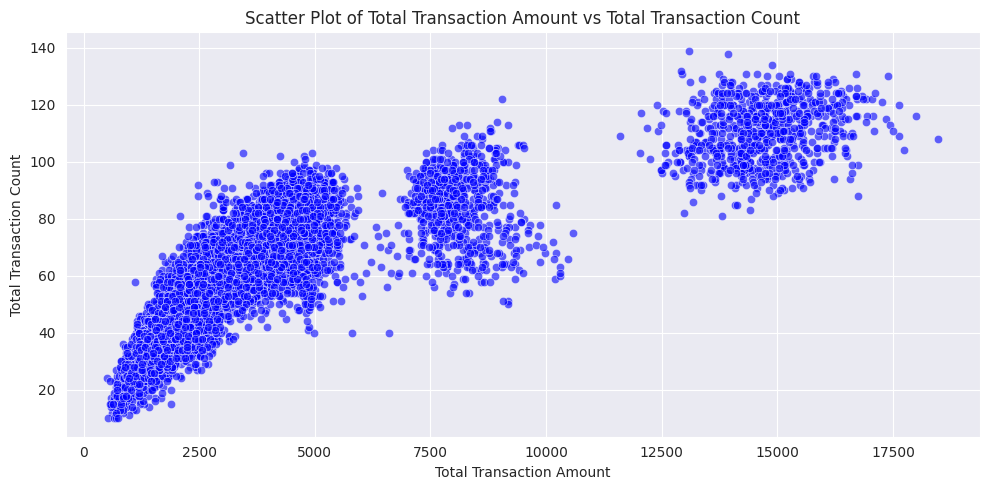

In [131]:
# Total_Trans_Amt: Total jumlah transaksi selama periode tertentu (Integer).
# Total_Trans_Ct: Jumlah total transaksi selama periode tertentu (Integer).
plt.figure(figsize=(10, 5))

# Membuat scatter plot untuk Total Transaction Amount vs Total Transaction Count
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=credit_card, color='blue', alpha=0.6)

plt.title('Scatter Plot of Total Transaction Amount vs Total Transaction Count')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Total Transaction Count')

# Menampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Histogram of Average Utilization Ratio**

**Distribusi Data**
- Sebagian besar pelanggan memiliki Average Utilization Ratio yang sangat rendah, terlihat dari puncak yang sangat tinggi di dekat nilai 0.
- Ini berarti bahwa banyak pelanggan yang menggunakan hanya sebagian kecil dari batas kredit mereka.
- Setelah itu, frekuensi menurun secara eksponensial seiring dengan meningkatnya nilai rasio. Hanya sedikit pelanggan yang memanfaatkan rasio kredit yang mendekati 1 (menggunakan kredit hampir sepenuhnya).

**KDE (Kernel Density Estimation)**
- Garis ungu halus di atas histogram adalah KDE, yang menunjukkan estimasi kerapatan probabilitas dari data ini.
- KDE menghaluskan distribusi frekuensi, memberikan pandangan yang lebih jelas tentang pola distribusi dari data.

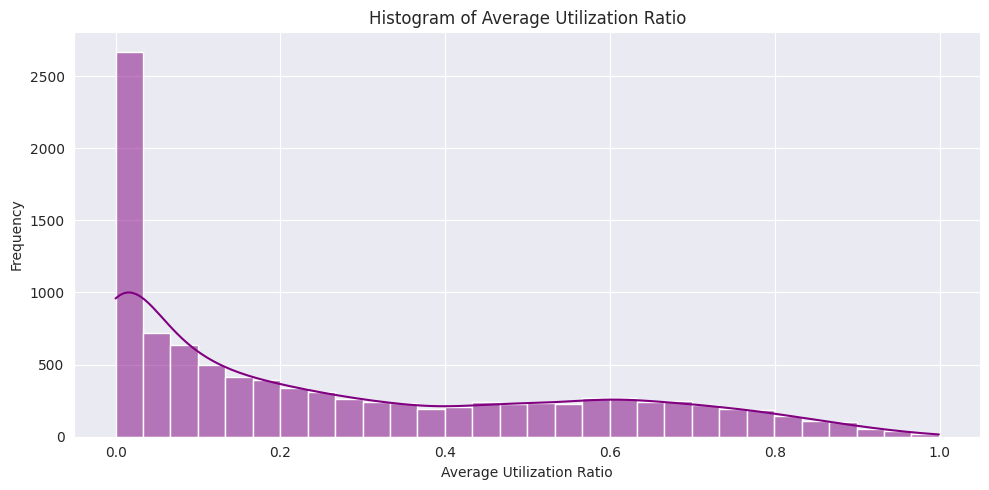

In [132]:
# Avg_Utilization_Ratio: Rata-rata rasio pemanfaatan kredit pelanggan (Integer).
plt.figure(figsize=(10, 5))

# Membuat histogram untuk Avg Utilization Ratio dengan KDE
sns.histplot(x='Avg_Utilization_Ratio', data=credit_card, kde=True, color='purple', bins=30)

# Menambahkan judul dan label sumbu
plt.title('Histogram of Average Utilization Ratio')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Frequency')

# Menampilkan plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Label Encoder** adalah alat yang digunakan untuk mengonversi data kategorikal ke dalam format numerik.

In [133]:
le=LabelEncoder()
for column in categorical_features:
    credit_card[column]=le.fit_transform(credit_card[column])
credit_card.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1_mon1,Naive_Bayes_Classifier_2_mon2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Melihat Keterhubungan antara variabel dengan variabel Attrition_Flag

<ipython-input-134-997d782aa296>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Attrition_Flag", kind="bar", dodge=False, height = 4, aspect = 3,  data=credit_card, palette="Set3")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-134-997d782aa296>:2: FutureWa

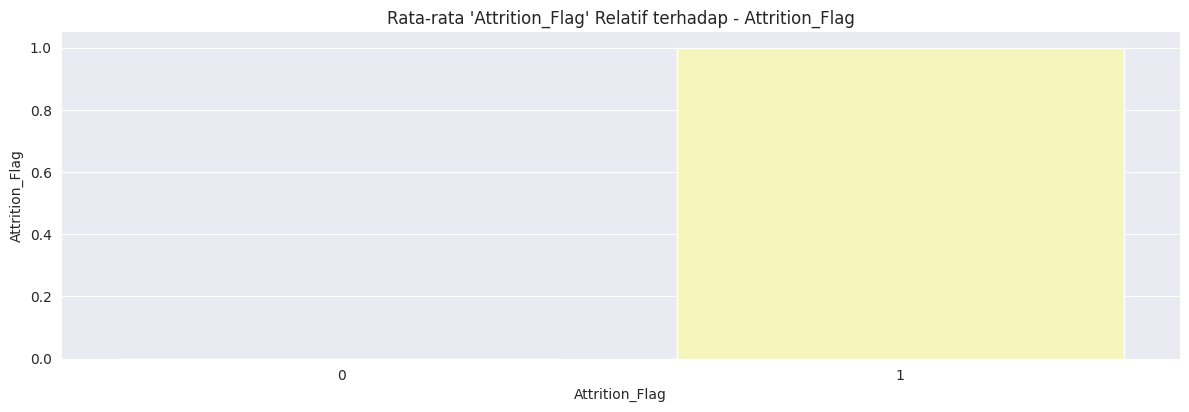

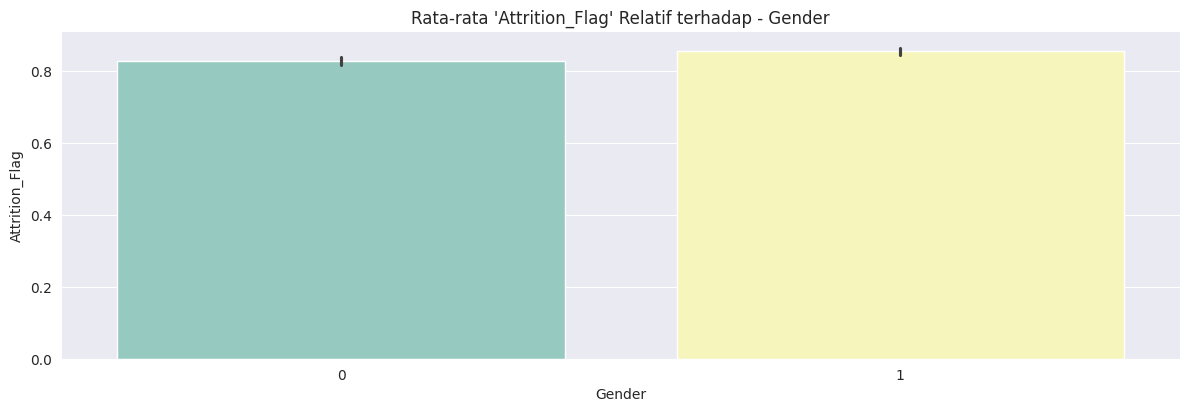

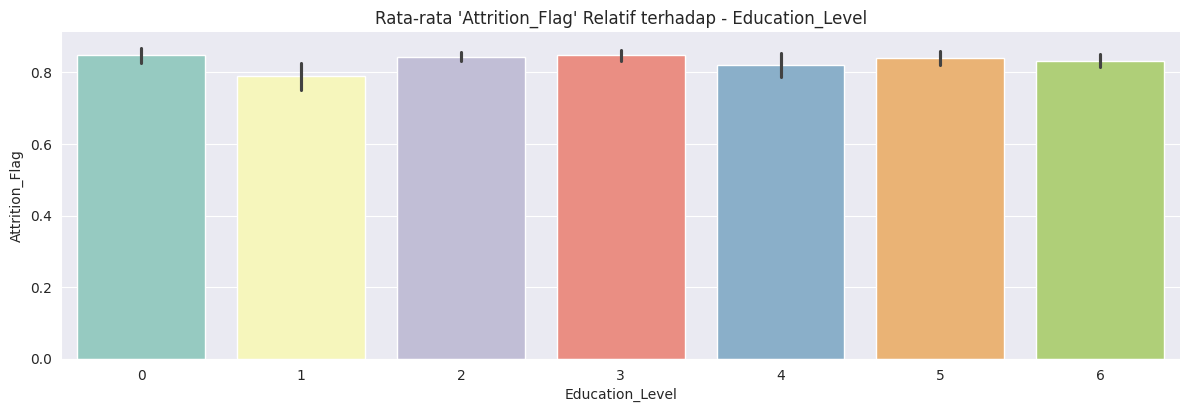

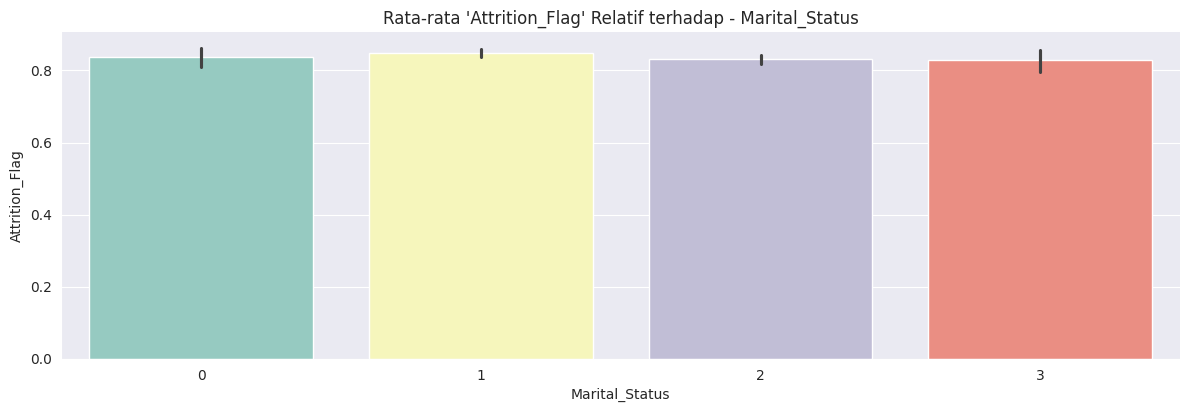

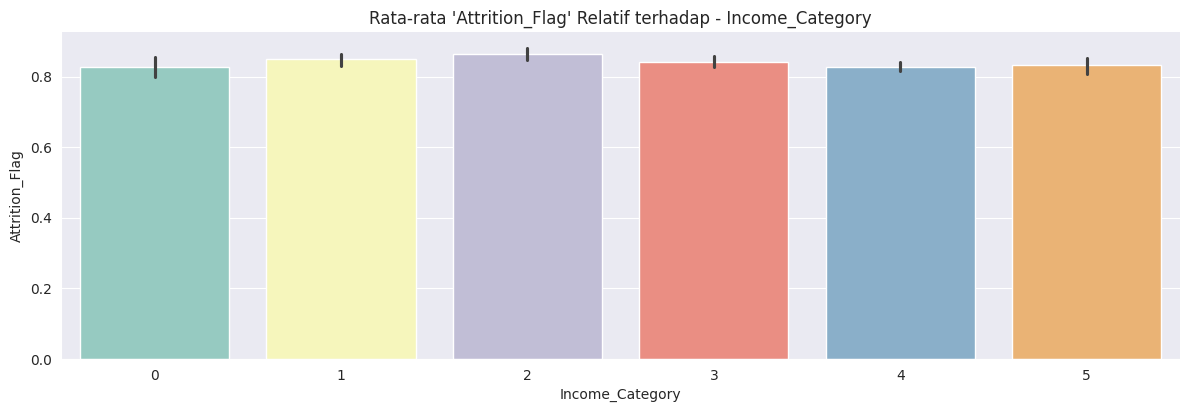

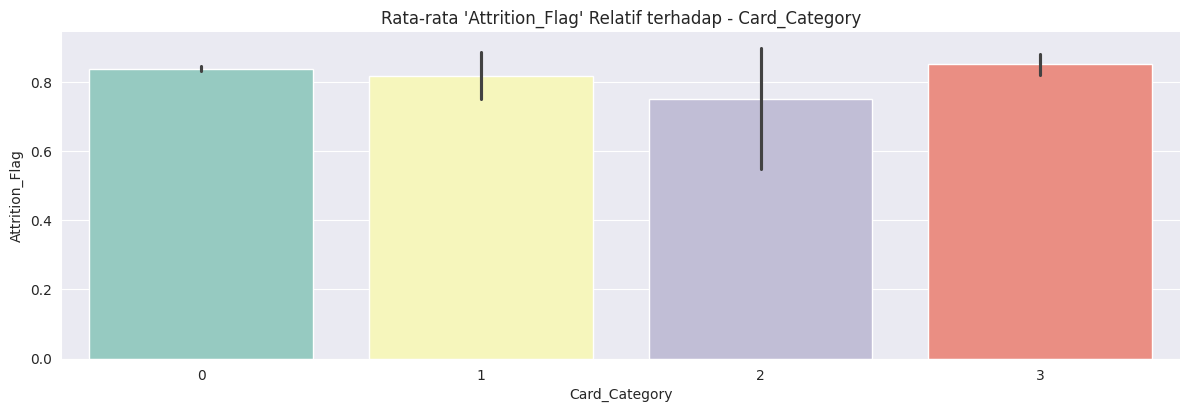

In [134]:
for col in categorical_features:
  sns.catplot(x=col, y="Attrition_Flag", kind="bar", dodge=False, height = 4, aspect = 3,  data=credit_card, palette="Set3")
  plt.title("Rata-rata 'Attrition_Flag' Relatif terhadap - {}".format(col))

**Menampilkan kolom yang tidak berjenis 'object'**

In [135]:
# Menampilkan kolom yang tidak berjenis 'object'
non_object_columns = credit_card.select_dtypes(exclude=['object']).columns

numeric_columns = non_object_columns.tolist()

print("Kolom selain 'object':", numeric_columns)

Kolom selain 'object': ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_1_mon1', 'Naive_Bayes_Classifier_2_mon2']


**Multivariat**

Berikut adalah hubungan antara Attrition_Flag (indikator apakah pelanggan meninggalkan atau tidak) dengan beberapa fitur lain:

**Total_Trans_Ct (Jumlah Total Transaksi):**

Korelasi antara Attrition_Flag dan Total_Trans_Ct adalah 0.4, yang berarti ada hubungan positif sedang. Ini menunjukkan bahwa semakin banyak transaksi yang dilakukan pelanggan, semakin kecil kemungkinan mereka untuk churn. Pelanggan yang lebih aktif cenderung bertahan.

**Total_Trans_Amt (Jumlah Total dari Semua Transaksi):**

Korelasi dengan Attrition_Flag adalah 0.2, yang menunjukkan hubungan positif. Pelanggan yang menghabiskan lebih banyak uang melalui transaksi cenderung tidak meninggalkan layanan.


**Total_Relationship_Count (Jumlah Hubungan Total dengan Perusahaan):**

Korelasi 0.2 dengan Attrition_Flag menunjukkan bahwa semakin banyak interaksi atau hubungan yang dimiliki pelanggan dengan perusahaan (misalnya melalui layanan, produk, atau kontak lainnya), semakin kecil kemungkinan mereka untuk churn.

**Avg_Utilization_Ratio (Rata-rata Penggunaan Kredit):**

Korelasi dengan Attrition_Flag adalah 0.2, yang berarti ada hubungan positif kecil. Pelanggan dengan rasio penggunaan kredit yang lebih tinggi (menggunakan lebih banyak dari kredit mereka yang tersedia) cenderung lebih mungkin untuk churn.

**Total_Revolving_Bal (Total Saldo Berputar):**

Korelasi positif 0.3 dengan Attrition_Flag, meskipun kecil. Ini menunjukkan sedikit kecenderungan bahwa pelanggan dengan saldo berputar lebih besar mungkin lebih mungkin untuk churn.

**Months_Inactive_12_mon (Bulan Tidak Aktif dalam 12 Bulan Terakhir):**

Korelasi kecil negatif -0.2 menunjukkan bahwa pelanggan yang lebih lama tidak aktif dalam 12 bulan terakhir lebih cenderung untuk churn.

**Contacts_Count_12_mon (Jumlah Kontak dengan Perusahaan dalam 12 Bulan Terakhir):**

Korelasi kecil negatif -0.2, menunjukkan bahwa semakin banyak kontak dengan perusahaan, semakin kecil kemungkinan pelanggan akan churn. Namun, pengaruhnya sangat kecil.

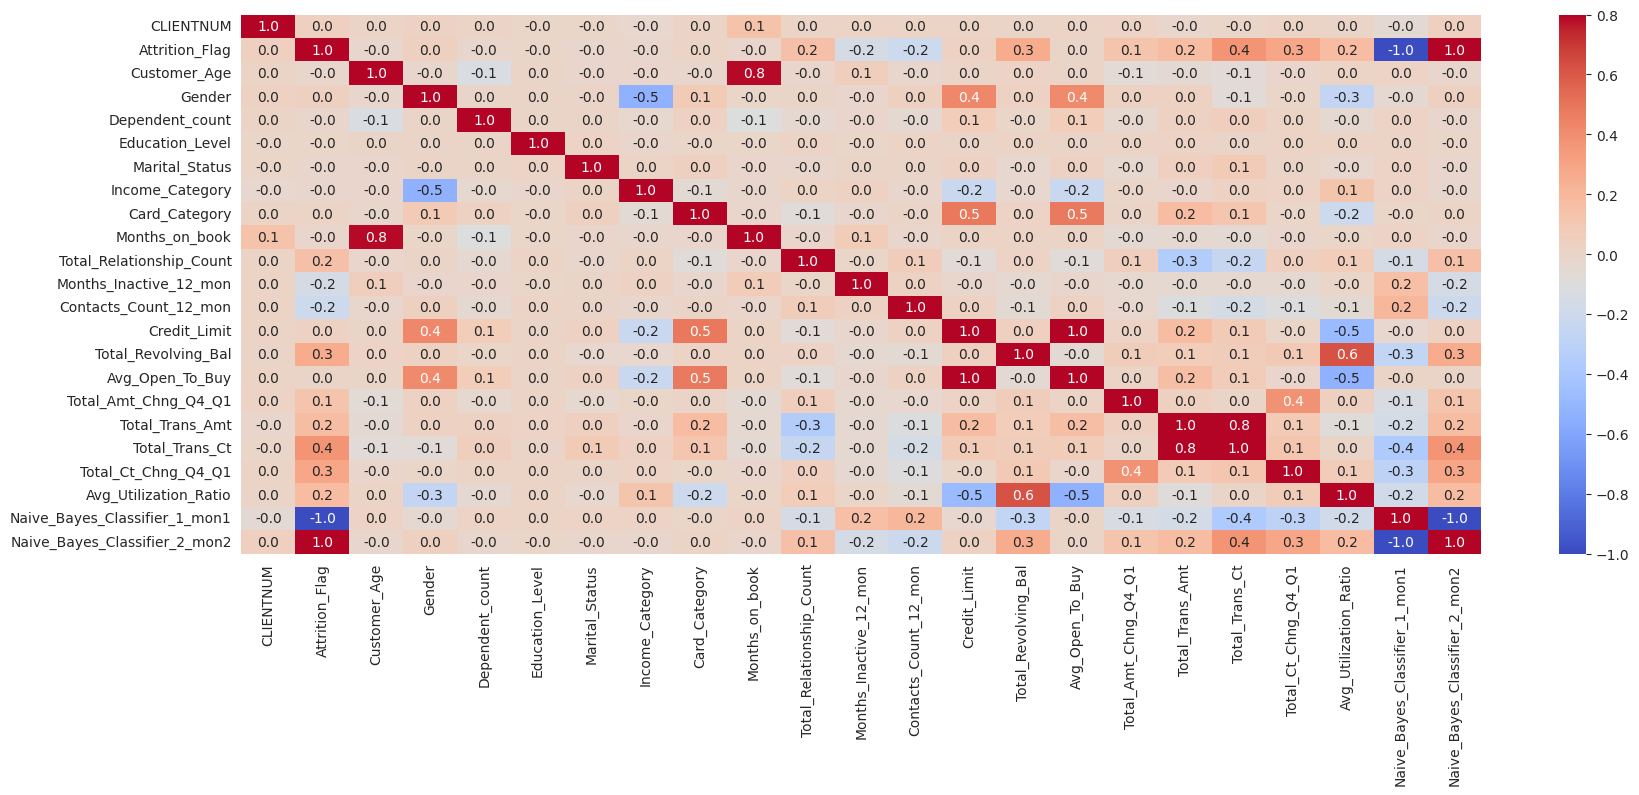

In [136]:
# plt.figure(figsize=(10, 8))
# correlation_matrix = credit_card[numeric_columns].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
# sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
# plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.figure(figsize=(20,7))
correlation=credit_card.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='coolwarm',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

Kode dibawah ini mempersiapkan data untuk proses pemodelan dengan menghapus beberapa kolom yang tidak diperlukan, memisahkan variabel target dari fitur, melakukan standarisasi fitur numerik, dan membagi dataset menjadi data pelatihan dan pengujian.

In [137]:
from sklearn.model_selection import train_test_split

#  menghapus banyak kolom menggunakan drop
credit_card_drop = credit_card.drop(['Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Dependent_count', 'Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1)
y = credit_card['Attrition_Flag']
X = credit_card_drop.drop('Attrition_Flag', axis=1)

# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,CLIENTNUM,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_1_mon1,Naive_Bayes_Classifier_2_mon2
0,768805383,5,1,3,777,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,6,1,2,864,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,4,1,0,0,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,3,4,1,2517,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,5,1,0,0,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,3,2,3,1851,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,4,2,3,2186,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,5,3,4,0,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,4,3,3,0,8395,62,0.722,0.000,0.996710,0.003294


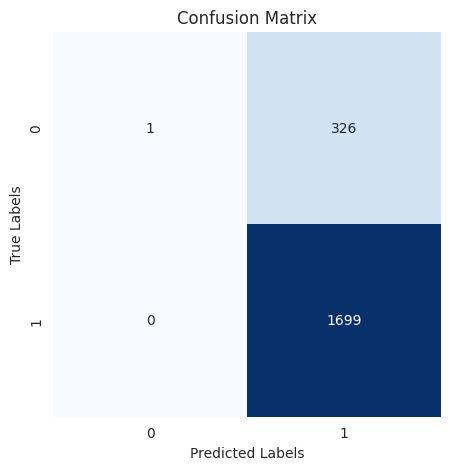

Akurasi pada data training: 0.8410072830514751
Accuracy Score: 0.8390918065153011

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.92      0.50      0.46      2026
weighted avg       0.86      0.84      0.77      2026



In [140]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Latih model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediksi hasil pada test data
y_pred = logreg.predict(X_test)

# Prediksi pada data training
y_train_pred = logreg.predict(X_train)

# Evaluasi model menggunakan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Hitung akurasi pada data training
training_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Akurasi pada data training: {training_accuracy}')
# Laporan klasifikasi
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [139]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest:")

# Prediksi pada data training
y_train_pred = rf_clf.predict(X_train)
# Hitung akurasi pada data training
training_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Akurasi pada data training: {training_accuracy}')
print(f"Accuracy Score: {rf_acc}")

print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest:
Akurasi pada data training: 1.0
Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00      1699

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026

